## Enunciado

>Considere el proyecto cuya información se adjunta.
> 1. Dibuje el diagrama Pert y determine el camino crítico.
> 2. Indique el coste de realización para duración PERT
> 3. A la vista de la planificación dada, su jefe le dice que el proyeco tiene que ejecutarse en 12 o menos periodos. ¿Con qué probabilidad estima que se verán cumplidos los deseos de su jefe?
> 4. Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.

In [1]:
# Alargamos el ancho de las celdas al 100%
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import pandas as pd
import numpy as np

datos_enunciado = pd.DataFrame([
#  actividad, precedentes, b, m, a, coste_duracion_pert, coste_duracion_tope, duracion_tope
     ('A', '---  ',   6,  2.5, 2, 1600, 1800, 2),
     ('B', '---  ',   2,    2, 2, 2900, 2900, 1),
     ('C', '---  ',   1,    1, 1,  600,  600, 1),
     ('D', '---  ',   1,    1, 1,  600,  600, 1),
     ('E', 'A,B  ',  12,    5, 4, 1600, 2200, 2),
     ('F', 'A,B  ',  12,  2.5, 2, 2000, 2200, 1),
     ('G', 'B,C  ',   6, 1.25, 1,  600,  700, 1),
     ('H', 'B,C  ',  20,   13, 6, 3500, 4900, 3),
     ('I', 'D    ',  30,   12, 6, 3500, 4300, 4),
     ('J', 'E,M  ',   4,    4, 4, 1500, 1500, 2),
     ('K', 'F    ',   7,    7, 7, 2000, 2000, 3),
     ('L', 'J,K,G',   1,    1, 1, 1000, 1000, 1),
     ('M', 'F    ',   3,    3, 3,  500,  500, 1),
    
] ,columns=['actividad', 'precedentes', 'b', 'm', 'a',
            'coste_duracion_pert', 'coste_duracion_tope', 'duracion_tope']).set_index('actividad')

datos_enunciado

,precedentes,b,m,a,coste_duracion_pert,coste_duracion_tope,duracion_tope
actividad,,,,,,,
A,---,6,2.50,2,1600,1800,2
B,---,2,2.00,2,2900,2900,1
C,---,1,1.00,1,600,600,1
D,---,1,1.00,1,600,600,1
E,"A,B",12,5.00,4,1600,2200,2
F,"A,B",12,2.50,2,2000,2200,1
G,"B,C",6,1.25,1,600,700,1
H,"B,C",20,13.00,6,3500,4900,3
I,D,30,12.00,6,3500,4300,4


## Solución
### Apartado 1

> Dibuje el diagrama Pert y determine el camino crítico.

En pmule (project management at ULE) está el código que utilizamos para calcular los valores del PERT.

In [2]:
from pmule import GrafoProyecto

La clase PertGraph permite visualizar el grafo PERT, el diagrama de Gantt así como realizar el cálculo de tiempos tempranos, tardíos y de las holguras totales.

In [3]:
aristas = pd.DataFrame([
# actividad, nodo_inicial, nodo_final
  (  'A', 1,  3 ),
  (  'B', 1,  2 ),
  (  'C', 1,  4 ),
  (  'D', 1,  5 ),
  (  'E', 3,  7 ),
  (  'F', 3,  6 ),
  (  'G', 4,  8 ),
  (  'H', 4,  9 ),
  (  'I', 5,  9 ),
  (  'J', 7,  8 ),
  (  'K', 6,  8 ),
  (  'L', 8,  9 ),
  (  'M', 6,  7 ),
  ( 'f1', 2,  3 ),
  ( 'f2', 2,  4 ),  
] ,columns=['actividad', 'nodo_inicial', 'nodo_final']).set_index('actividad')

datos_proyecto = pd.concat([datos_enunciado, aristas], axis=1, sort=False).set_index(aristas.index).fillna(0)
datos_proyecto

,precedentes,b,m,a,coste_duracion_pert,coste_duracion_tope,duracion_tope,nodo_inicial,nodo_final
actividad,,,,,,,,,
A,---,6.0,2.50,2.0,1600.0,1800.0,2.0,1,3
B,---,2.0,2.00,2.0,2900.0,2900.0,1.0,1,2
C,---,1.0,1.00,1.0,600.0,600.0,1.0,1,4
D,---,1.0,1.00,1.0,600.0,600.0,1.0,1,5
E,"A,B",12.0,5.00,4.0,1600.0,2200.0,2.0,3,7
F,"A,B",12.0,2.50,2.0,2000.0,2200.0,1.0,3,6
G,"B,C",6.0,1.25,1.0,600.0,700.0,1.0,4,8
H,"B,C",20.0,13.00,6.0,3500.0,4900.0,3.0,4,9
I,D,30.0,12.00,6.0,3500.0,4300.0,4.0,5,9


In [4]:
proyecto = GrafoProyecto(datos_proyecto)

##### Grafo PERT con numeración de nodos

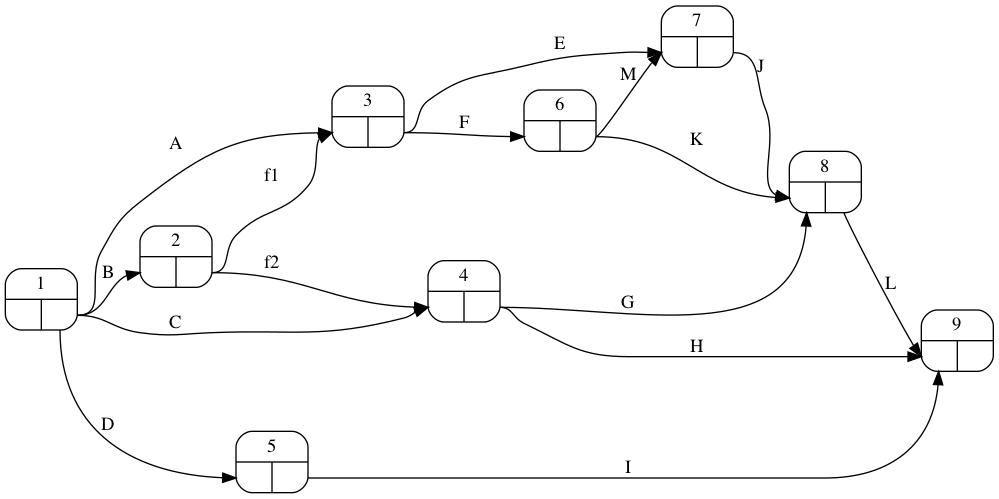

In [5]:
proyecto.pert(filename='pert_nodos.png',
              duraciones=None,
              orientation='portrait', ranksep=0.5, nodesep=0.5)

##### Cálculo de las duraciones PERT

A partir de las duraciones optimista, pesimista y modal podemos calcular la duración pert de las actividades.

In [6]:
datos_proyecto['duracion_pert'] = datos_proyecto.eval('(b + 4*m +a)/6')
datos_proyecto[['b', 'm', 'a', 'duracion_pert']]

,b,m,a,duracion_pert
actividad,,,,
A,6.0,2.50,2.0,3.0
B,2.0,2.00,2.0,2.0
C,1.0,1.00,1.0,1.0
D,1.0,1.00,1.0,1.0
E,12.0,5.00,4.0,6.0
F,12.0,2.50,2.0,4.0
G,6.0,1.25,1.0,2.0
H,20.0,13.00,6.0,13.0
I,30.0,12.00,6.0,14.0


##### Matriz de Zaderenko 

In [7]:
zaderenko = proyecto.zaderenko(datos_proyecto['duracion_pert'])
zaderenko

,1,2,3,4,5,6,7,8,9,temprano
1,,2,3,1,1,,,,,0
2,,,0,0,,,,,,2
3,,,,,,4,6,,,3
4,,,,,,,,2,13,2
5,,,,,,,,,14,1
6,,,,,,,3,7,,7
7,,,,,,,,4,,10
8,,,,,,,,,1,14
9,,,,,,,,,,15
tardios,0,2,3,2,1,7,10,14,15,


In [8]:
resultados_pert = proyecto.calcula_pert(duraciones=datos_proyecto['duracion_pert'])
resultados_pert['tiempos']

,tempranos,tardios
1,0.0,0.0
5,1.0,1.0
2,2.0,2.0
4,2.0,2.0
3,3.0,3.0
6,7.0,7.0
7,10.0,10.0
8,14.0,14.0
9,15.0,15.0


##### Holguras

In [9]:
resultados_pert['H_total']

A      0.0
B      0.0
C      1.0
D      0.0
f1     1.0
f2     0.0
E      1.0
F      0.0
G     10.0
H      0.0
I      0.0
K      0.0
M      0.0
J      0.0
L      0.0
dtype: float64

###### Camino crítico

In [10]:
camino_critico = proyecto.camino_critico(datos_proyecto['duracion_pert'])
camino_critico

Index(['A', 'B', 'D', 'f2', 'F', 'H', 'I', 'K', 'M', 'J', 'L'], dtype='object')

##### Grafo PERT con indicación de tiempos

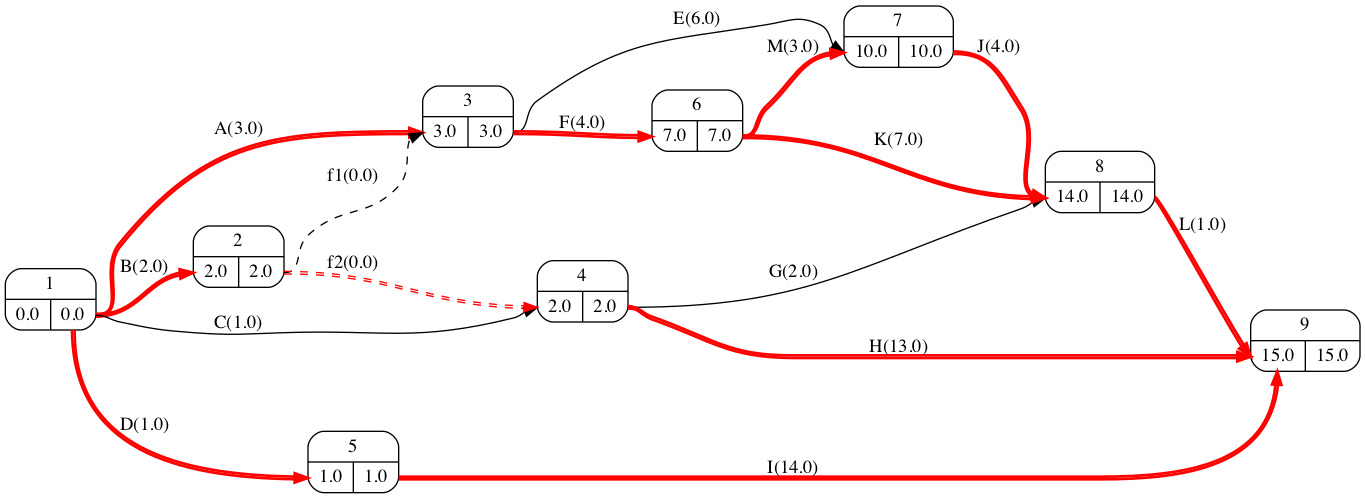

In [11]:
filename='pert_tiempos_apartado_1.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto['duracion_pert'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

### Apartado 2
> 2. Indique el coste de realización para duración PERT

Para responder este apartado tan sólo es necesario sumar los costes indicados en la columna coste_duracion_pert.

In [12]:
datos_proyecto['coste_duracion_pert']

actividad
A     1600.0
B     2900.0
C      600.0
D      600.0
E     1600.0
F     2000.0
G      600.0
H     3500.0
I     3500.0
J     1500.0
K     2000.0
L     1000.0
M      500.0
f1       0.0
f2       0.0
Name: coste_duracion_pert, dtype: float64

In [13]:
datos_proyecto['coste_duracion_pert'].sum()

21900.0

### Apartado 3
> A la vista de la planificación dada, su jefe le dice que el proyeco tiene que ejecutarse en 12 o menos periodos. ¿Con qué probabilidad estima que se verán cumplidos los deseos de su jefe?


##### Duración media del proyecto

La duración media del proyecto ya la tenemos calculada:

In [14]:
duracion_media_proyecto = proyecto.duracion_proyecto(duraciones=datos_proyecto['duracion_pert'])
duracion_media_proyecto

15.0

##### Desviación típica del proyecto

Para determinar la desviación típica de la duración del proyecto debemos obtener en cada rama del camino crítico la suma de las varianzas, y quedarnos con la mayor. Como el enunciado no proporciona el dato correspondiente a la varianza es necesario calcularla previamente.

In [15]:
datos_proyecto['varianza'] = datos_proyecto.eval('((b-a)/6) ** 2')
datos_proyecto[['b', 'a','varianza']]

,b,a,varianza
actividad,,,
A,6.0,2.0,0.444444
B,2.0,2.0,0.000000
C,1.0,1.0,0.000000
D,1.0,1.0,0.000000
E,12.0,4.0,1.777778
F,12.0,2.0,2.777778
G,6.0,1.0,0.694444
H,20.0,6.0,5.444444
I,30.0,6.0,16.000000


Calculamos la varianza para cada rama:

In [16]:
rama_1  = ['A', 'F', 'M', 'J', 'L']
rama_2  = ['A', 'F', 'K', 'L']
rama_3  = ['B', 'f2', 'H']
rama_4  = ['D', 'I']

###### Varianza rama 1

In [17]:
datos_proyecto.loc[rama_1, 'varianza']

actividad
A    0.444444
F    2.777778
M    0.000000
J    0.000000
L    0.000000
Name: varianza, dtype: float64

In [18]:
varianza_1 = datos_proyecto.loc[rama_1, 'varianza'].sum()
varianza_1

3.2222222222222223

###### Varianza rama 2

In [19]:
datos_proyecto.loc[rama_2, 'varianza']

actividad
A    0.444444
F    2.777778
K    0.000000
L    0.000000
Name: varianza, dtype: float64

In [20]:
varianza_2 = datos_proyecto.loc[rama_2, 'varianza'].sum()
varianza_2

3.2222222222222223

###### Varianza rama 3

In [21]:
datos_proyecto.loc[rama_3, 'varianza']

actividad
B     0.000000
f2    0.000000
H     5.444444
Name: varianza, dtype: float64

In [22]:
varianza_3 = datos_proyecto.loc[rama_3, 'varianza'].sum()
varianza_3

5.4444444444444455

###### Varianza rama 4

In [23]:
datos_proyecto.loc[rama_4, 'varianza']

actividad
D     0.0
I    16.0
Name: varianza, dtype: float64

In [24]:
varianza_4 = datos_proyecto.loc[rama_4, 'varianza'].sum()
varianza_4

16.0

###### Varianza y desviación típica del proyecto

In [25]:
varianza_proyecto = max(varianza_1,
                        varianza_2,
                        varianza_3,
                        varianza_4)
desviacion_proyecto = varianza_proyecto ** 0.5
desviacion_proyecto

4.0

El proyecto sigue una distribución normal con media 15 y desviación típica 4.

##### Cálculo de la probabilidad

Una vez caracterizada la distribución normal con la que aproximamos la duración del proyecto, podemos hacer el cálculo de la probabilidad:

In [26]:
import scipy
from scipy.stats import norm

probabilidad_de_terminar_antes_de_12 = norm.cdf(12, loc=duracion_media_proyecto, scale=desviacion_proyecto)
probabilidad_de_terminar_antes_de_12 * 100

22.66273523768682

### Apartado 4. 

> Reduzca la duración del proyecto dos unidades de tiempo con el menor incremento de coste posible.


Se aborda la solución de este apartado mediante la técnica de reducción de la duración del proyecto con mínimo coste.

##### Cálculo del coste unitario de reducción

In [27]:
datos_proyecto['cur'] = datos_proyecto.eval('(coste_duracion_tope - coste_duracion_pert)/(duracion_pert - duracion_tope)')
datos_proyecto[['coste_duracion_tope', 'coste_duracion_pert', 'duracion_pert', 'duracion_tope', 'cur']]

,coste_duracion_tope,coste_duracion_pert,duracion_pert,duracion_tope,cur
actividad,,,,,
A,1800.0,1600.0,3.0,2.0,200.000000
B,2900.0,2900.0,2.0,1.0,0.000000
C,600.0,600.0,1.0,1.0,NaN
D,600.0,600.0,1.0,1.0,NaN
E,2200.0,1600.0,6.0,2.0,150.000000
F,2200.0,2000.0,4.0,1.0,66.666667
G,700.0,600.0,2.0,1.0,100.000000
H,4900.0,3500.0,13.0,3.0,140.000000
I,4300.0,3500.0,14.0,4.0,80.000000


##### Situación inicial de partida

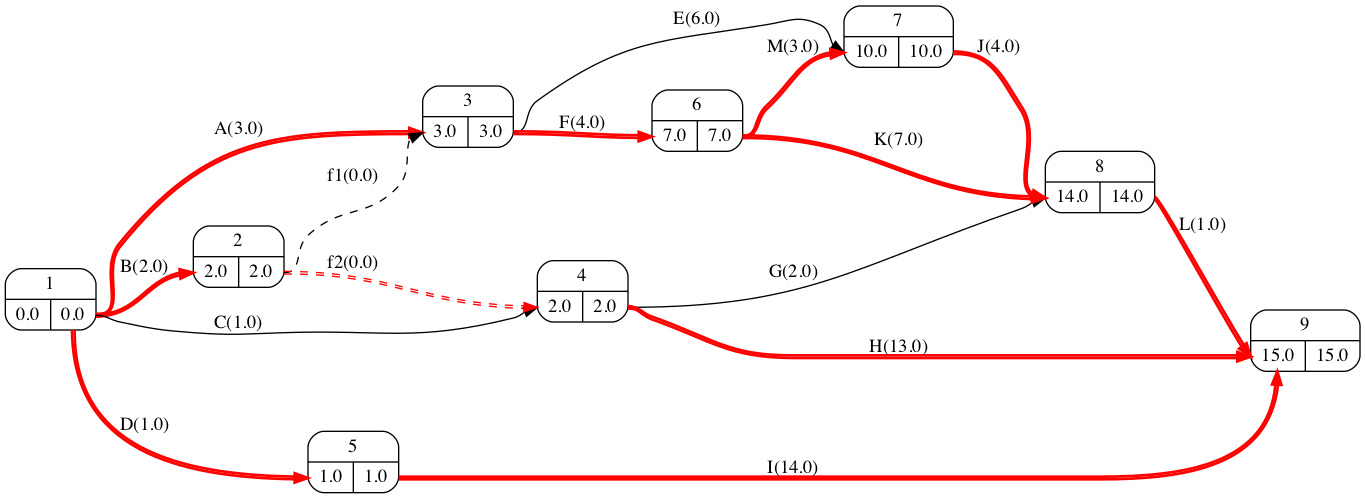

In [28]:
filename='pert_apartado_4_situacion_inicial.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto['duracion_pert'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

Para analizar el efecto de la reducción de la duración usaremos una nueva matriz para almacenar los datos de las duraciones:


In [29]:
datos_proyecto_reduccion = datos_proyecto.copy()

##### Primera reducción de la duración del proyecto en un periodo

Analizamos los costes unitarios de reducción y la capacidad de reducción de cada tarea de las ramas críticas:

###### Análisis rama 1

In [30]:
datos_proyecto_reduccion.loc[rama_1, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
M,0.000000,3.0,1.0
J,0.000000,4.0,2.0
F,66.666667,4.0,1.0
A,200.000000,3.0,2.0
L,NaN,1.0,1.0


En la rama 1 las actividad reducibles más baratas son la M y la J, que salen a coste cero.

###### Análisis rama 2

In [31]:
datos_proyecto_reduccion.loc[rama_2, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
K,0.000000,7.0,3.0
F,66.666667,4.0,1.0
A,200.000000,3.0,2.0
L,NaN,1.0,1.0


En la rama 2 la actividad reducible más barata es la K.

###### Análisis rama 3

In [32]:
datos_proyecto_reduccion.loc[rama_3, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
B,0.0,2.0,1.0
H,140.0,13.0,3.0
f2,NaN,0.0,0.0


En la rama 3 la actividad reducible más barata es la B.

###### Análisis rama 4

In [33]:
datos_proyecto_reduccion.loc[rama_4, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
I,80.0,14.0,4.0
D,NaN,1.0,1.0


En la rama 4 la actividad reducible más barata es la I.

###### Reducción de actividades en la primera iteración.

Se propone reducir un periodo las actividades M, K, B, I. El coste asociado a tal reducción es:

In [34]:
datos_proyecto_reduccion.loc[['M', 'K', 'B', 'I'], 'cur'].sum()

80.0

In [35]:
datos_proyecto_reduccion.loc[['M', 'K', 'B', 'I'], 'duracion_pert'] -=1

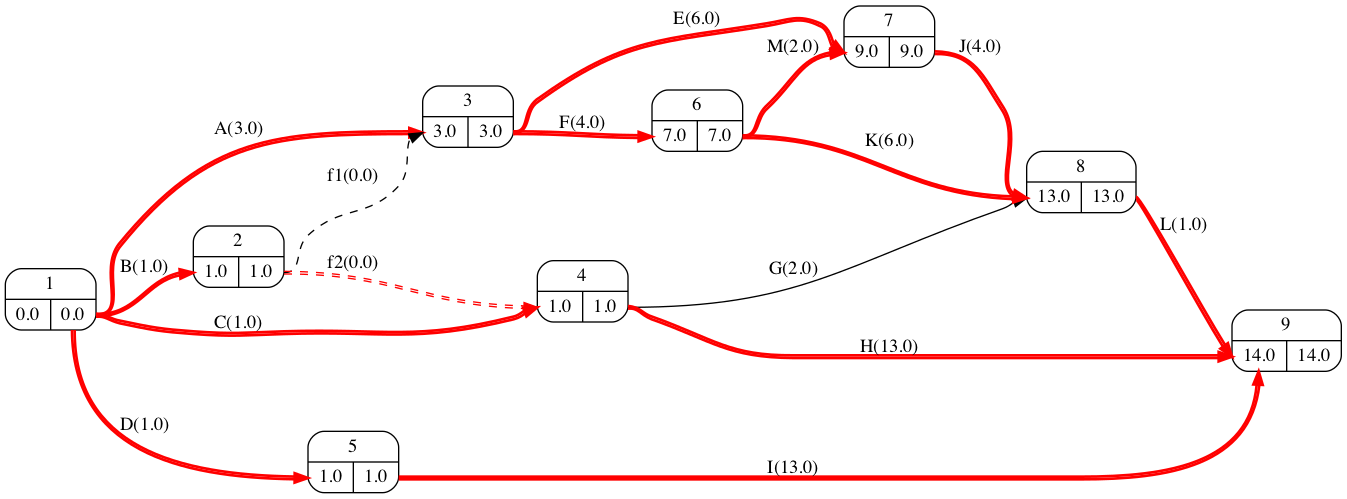

In [36]:
filename='pert_apartado_4_primera_reduccion.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion_pert'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)

#### Segunda reducción de la duración del proyecto en un periodo

Tras la primera reducción ha surgido una nueva rama crítica que llamaremos rama 5.

###### Análisis rama 5

In [37]:
rama_5 = ['A', 'E', 'J', 'L']

In [38]:
datos_proyecto_reduccion.loc[rama_5, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
J,0.0,4.0,2.0
E,150.0,6.0,2.0
A,200.0,3.0,2.0
L,NaN,1.0,1.0


En la rama 5 la actividad reducible más barata es la J.

###### Análisis rama 1

In [39]:
datos_proyecto_reduccion.loc[rama_1, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
M,0.000000,2.0,1.0
J,0.000000,4.0,2.0
F,66.666667,4.0,1.0
A,200.000000,3.0,2.0
L,NaN,1.0,1.0


En la rama 1 las actividad reducibles más baratas son la M y la J, que salen a coste cero. No obstante la actividad J es común a la rama 5.

##### Análisis rama 2

In [40]:
datos_proyecto_reduccion.loc[rama_2, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
K,0.000000,6.0,3.0
F,66.666667,4.0,1.0
A,200.000000,3.0,2.0
L,NaN,1.0,1.0


En la rama 2 la actividad reducible más barata es la K.

##### Análisis rama 3

In [41]:
datos_proyecto_reduccion.loc[rama_3, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
B,0.0,1.0,1.0
H,140.0,13.0,3.0
f2,NaN,0.0,0.0


En la rama 3 la actividad reducible más barata es la H.

##### Análisis rama 4

In [42]:
datos_proyecto_reduccion.loc[rama_4, ['cur', 'duracion_pert', 'duracion_tope']].sort_values(by='cur')

,cur,duracion_pert,duracion_tope
actividad,,,
I,80.0,13.0,4.0
D,NaN,1.0,1.0


En la rama 4 la actividad reducible más barata es la I.

###### Reducción de actividades en la segunda iteración.

Se propone reducir un periodo las actividades J, K, H, I. El coste asociado a tal reducción es:

In [43]:
datos_proyecto_reduccion.loc[['J', 'K', 'H', 'I'], 'cur'].sum()

220.0

In [44]:
datos_proyecto_reduccion.loc[['J', 'K', 'H', 'I'], 'duracion_pert'] -=1

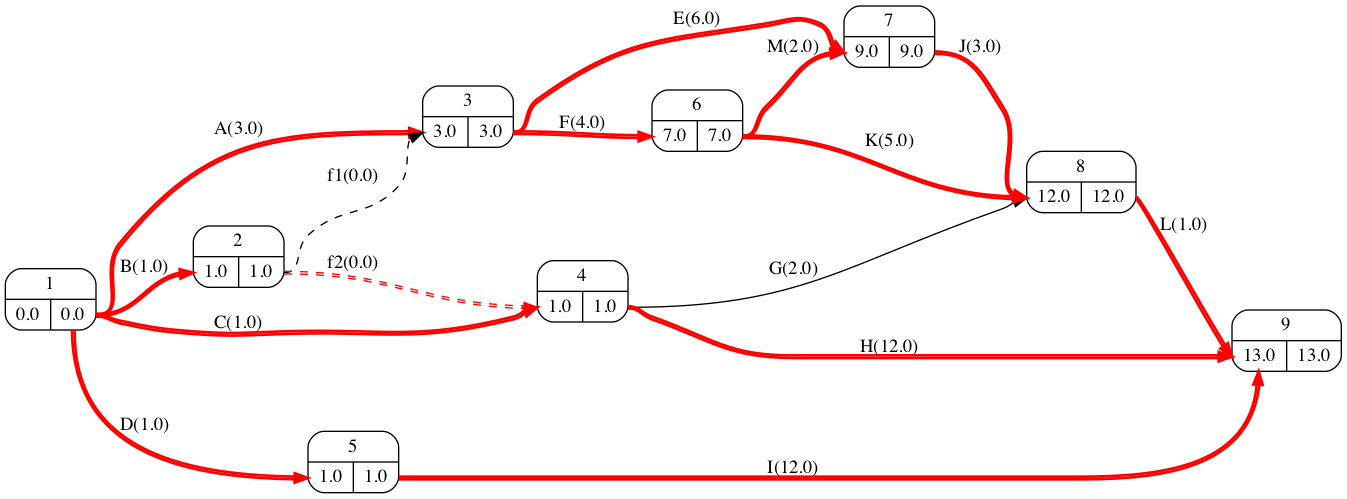

In [45]:
filename='pert_apartado_4_segunda_reduccion.png'
proyecto.pert(filename=filename,
              duraciones=datos_proyecto_reduccion['duracion_pert'],
              orientation='portrait', ranksep=0.5, nodesep=0.5)